# Predicting heart disease using machine learning

## Part - 1  Problem definition

Using the tools from different sources we going to build a machine learning tool to predict whather a patient have heart disease or not using their medical result

## part - 2  Data

The data comes from cleavland data from the MCI machine learning repository

## part - 3 Evaluation

 > If you achieve a 95% of accuracy on our prediction of whether a patient have heart disease or not we have succefuly build the model and stop it
 
## part - 4  Features
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
* condition: 0 = no disease, 1 = disease

In [2]:
# Data analysis and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# importing machin learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# imoprting model evluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_score,f1_score,recall_score,plot_roc_curve

In [3]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.info(),heart_disease.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None, (303, 14))

In [5]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

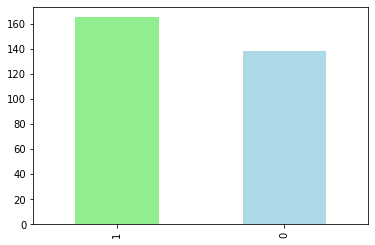

In [6]:
heart_disease['target'].value_counts().plot(kind="bar",color=['lightgreen','lightblue'])

In [7]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploring Heart disease 

#### Heart disease frequency according to sex

In [8]:
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(heart_disease['target'],heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

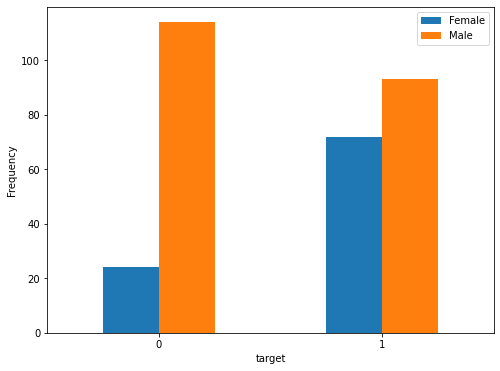

In [10]:
pd.crosstab(heart_disease['target'],heart_disease['sex']).plot(kind="bar",figsize=(8,6))
plt.legend(['Female','Male'])
plt.ylabel("Frequency")
plt.xticks(rotation=0)

In [11]:
heart_disease['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [12]:
pd.crosstab(heart_disease['target'],heart_disease['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


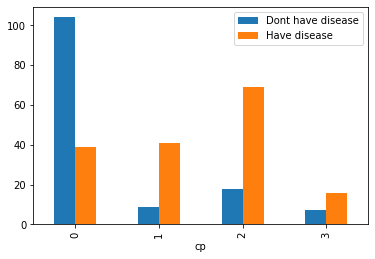

In [13]:
pd.crosstab(heart_disease['cp'],heart_disease['target']).plot(kind="bar")
plt.legend(['Dont have disease','Have disease'])


In [14]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [15]:
heart_disease_corr = heart_disease.corr()


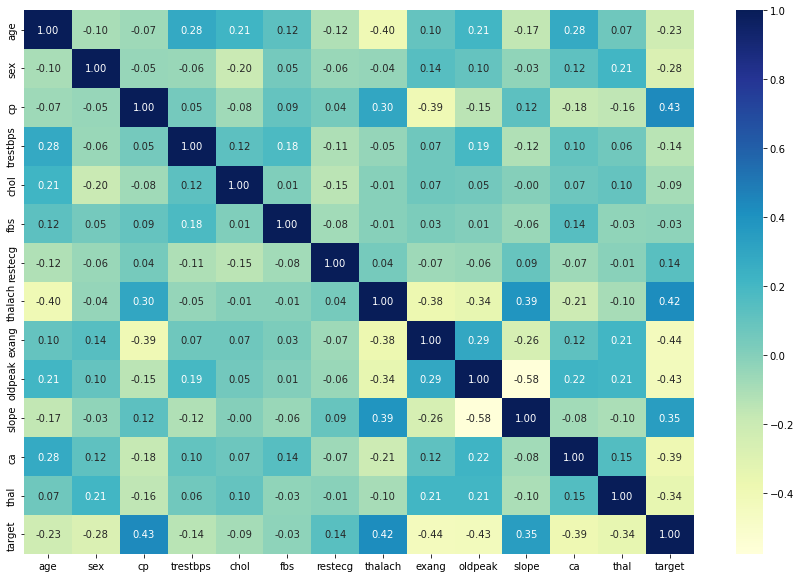

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(heart_disease_corr,cmap="YlGnBu",annot=True,fmt=".2f")


### On the above diagram we can see the corelation of each  attribute with each other that means the correlation of an attribute with it self 1(perfect)

## 5. Modeling
### We have explored and see how what data we have and how each data relate to each other. <br> Next we Build a machine learning model to predict if someone have heart disease or not

In [17]:
# We need to split our data into x(features) and y(label)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#### Next we have to split our data into train and test set. Because once the model train on the train test data it should be tested on new data (test data)

In [18]:
# to make our data reproducable we use random seed
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

(x_train.shape,y_train.shape), (x_test.shape,y_test.shape)

(((242, 13), (242,)), ((61, 13), (61,)))

### Creating a mode
#### We are going to use 3 different model to train on our data and then choose the best one
    1. Logistic regression
    2. K-nearest keighbour
    3. Random forest classifier
 

In [19]:
# We store our model into dictionary
models = {'logistic regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random forest': RandomForestClassifier()}

def train_and_score(models,x_train,x_test,y_train,y_test):
    # loop through the models then fit and evaluate our models
    
    score = {}
    
    for name,model in models.items():
        #fitting(train) the model 
        model.fit(x_train,y_train)
        
        #evaluating each model using the default evaluation method for the model
        score[name] = model.score(x_test,y_test)
    return score
        
        

In [20]:
model_metric = train_and_score(models,x_train,x_test,y_train,y_test)

C:\Users\ABDU\Desktop\project\data-science\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
model_metric

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8524590163934426}

<AxesSubplot:>

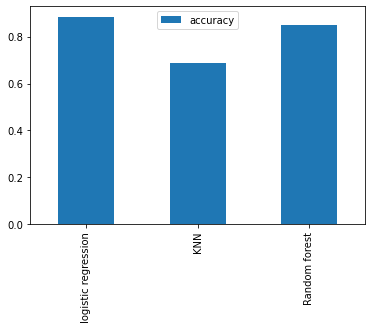

In [22]:
compere_model = pd.DataFrame(model_metric,index=['accuracy'])
compere_model.T.plot(kind="bar")
# plt.xticks(rotate=0.5)

### From the above metrics we know KNN is the worst but random forest and logistic regression is doing very well so if we use hyperparameter tuning we can get a better result

**Tuning hyperparameter manually for KNN**

In [23]:
neighbors = range(1,20)
test_result = []
train_result = []
for neighbor in neighbors:
    k_model = KNeighborsClassifier(n_neighbors=neighbor)
    
    k_model.fit(x_train,y_train)
    train_result.append(k_model.score(x_train,y_train))
    test_result.append(k_model.score(x_test,y_test))


0.7540983606557377


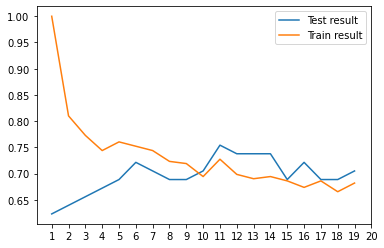

In [24]:

plt.plot(neighbors,test_result,label="Test result")
plt.plot(neighbors,train_result,label="Train result")
plt.xticks(range(1,21))
plt.legend()
print(max(test_result))

#### After tuning hyperparameter of KNN we foung the highest value when the n_neighbors = 11 (0.75)

### now we tunne our hyperparamater using SampleSearchCV for both LinearRegression and RandomForestClassifier

In [25]:
rf_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth': [None,2,6,8],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
    'max_features': ['auto','sqrt']
}
lg_grid = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}



In [26]:
# Tuning hyperparameter of LogisticRegression using RandomizedSearchCV

rc_lg_model = RandomizedSearchCV(LogisticRegression(),param_distributions=lg_grid,cv=5,n_iter=20,verbose=True)

In [27]:
rc_lg_model.fit(x_train,y_train)
rc_lg_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [28]:
rc_lg_model.score(x_test,y_test)

0.8852459016393442

#### After using random searchCV for logistic regression we get the same result as the first one
#### Next lets check for RandomForestClassifier

In [29]:
rc_rf_model = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=rf_grid,
                                 cv=5,n_iter=50,
                                 verbose=True)

In [30]:
rc_rf_model.fit(x_train,y_train)

rc_rf_model.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 910,
 'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_features': 'auto',
 'max_depth': 8}

In [31]:
rc_rf_model.score(x_test,y_test)

0.8688524590163934

#### Next we use GridSearchCV on our LogisticRegression model

In [32]:
lr_grid = {
    'C':np.logspace(-4,4,30),
    'solver':['liblinear']
}

gs_lr_model = GridSearchCV(LogisticRegression(),
                           param_grid=lr_grid,
                           cv=5,
                           verbose=True)

gs_lr_model.fit(x_train,y_train)

gs_lr_model.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [33]:
gs_lr_model.score(x_test,y_test)

0.8852459016393442

**We found the same score as the baseline modol score So we using this tuned model for our next valuation phase**

## Evaluating our tuned model using different methods other than accuracy

 * ROC and AUC curve
 * Confusion matrix
 * Accuracy score
 * Classification report
 * Racall score
 * F1 score

**We going to use Logistic regression for our 

C:\Users\ABDU\Desktop\project\data-science\heart-disease\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


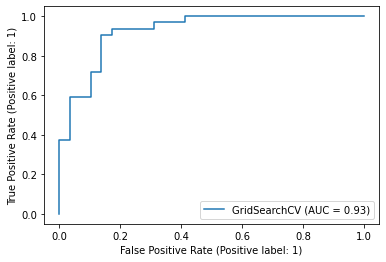

In [34]:
# ROC curve
plot_roc_curve(gs_lr_model,x_test,y_test)

In [35]:
# Next we evaluate our model using confusion matrix
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_pred):
    """
    Showing confusion matrix with a better look
    """
    fig, ax = plt.subplots(figsize=(7,7))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=True,)
    plt.xlabel("Truth value")
    plt.ylabel('Predicted value')

In [36]:
y_pred = gs_lr_model.predict(x_test)

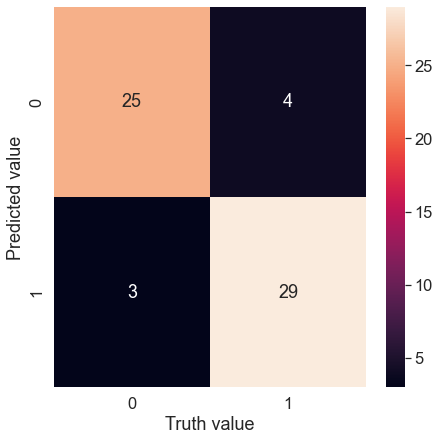

In [37]:
plot_confusion_matrix(y_test,y_pred)

In [38]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculating evaluation matrix using cross validation
#### Using cross validation we can calculate precision, accuracy,recall and f1 score.<br> To do it we going to use `cross_val_score()`

In [39]:
gs_lr_model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')

cr_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='accuracy')
cr_acc = np.mean(cr_acc)

In [41]:
cr_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='precision')
cr_precision = np.mean(cr_precision)
cr_precision

0.8207936507936507

In [42]:
cr_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='recall')
cr_recall = np.mean(cr_recall)
cr_recall

0.9212121212121213

In [43]:
cr_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='f1')
cr_f1 = np.mean(cr_f1)
cr_f1

0.8673007976269721

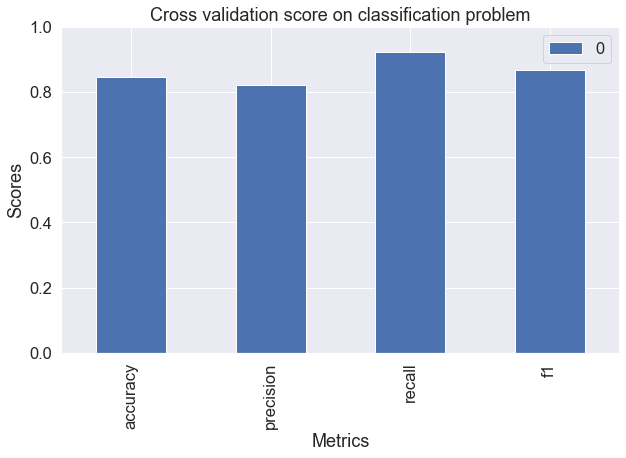

In [44]:
scores = pd.DataFrame({'accuracy':cr_acc,
                       'precision':cr_precision,
                       'recall':cr_recall,
                       'f1':cr_f1},index=[0])

scores.T.plot.bar(title="Cross validation score on classification problem",figsize=(10,6),ylim=[0,1],ylabel="Scores",xlabel="Metrics");

### Finally - Feature importance
#### Which features contribute the most for the outcome of the model and how did they contribute

#### Exporting our model

In [47]:
from joblib import dump

In [ ]:
dump(clf,'comp')